In [1]:
from IPython.display import display, Image
import dataframe_image as dfi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [2]:
from LagsCreator import LagsCreator

In [3]:
data = np.array([[np.nan, np.nan, 3, np.nan, np.nan, np.nan, np.nan, 8, np.nan, np.nan, np.nan, np.nan, 14, np.nan, np.nan, np.nan, np.nan, 19, np.nan, np.nan, np.nan, np.nan, 24, np.nan, np.nan, np.nan, np.nan, 29], 
                 [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 
                 [1, np.nan, np.nan, 4, np.nan, np.nan, 7, np.nan, np.nan, 11, np.nan, np.nan, 14, np.nan, np.nan, 17, np.nan, np.nan, 20, np.nan, np.nan, 23, np.nan, np.nan, 26, np.nan, np.nan, 29]])

In [4]:
df = pd.DataFrame(np.transpose(data), index = pd.date_range("2018-08-22", periods = data.shape[1]), columns = pd.MultiIndex.from_product([["Group 1"], ["C", "A", "B"]], names = ["Group", "Time-series"]))
df.index.name = "Datetime"

In [5]:
df["Group 1"]

Time-series,C,A,B
Datetime,,,
2018-08-22,NaN,1.0,1.0
2018-08-23,NaN,2.0,NaN
2018-08-24,3.0,3.0,NaN
2018-08-25,NaN,4.0,4.0
2018-08-26,NaN,5.0,NaN
2018-08-27,NaN,6.0,NaN
2018-08-28,NaN,7.0,7.0
2018-08-29,8.0,8.0,NaN
2018-08-30,NaN,10.0,NaN


In [6]:
lags_dict = dict()
# Define lags for each indicator.
lags_dict["C"] = np.array([1, 2, 3])
lags_dict["A"] = np.array([1, 2, 3, 4, 5])
lags_dict["B"] = np.array([1, 2, 3])

In [7]:
t1=time.time()
creator = LagsCreator(df["Group 1"], lags_dict, "A", delay = True) 
t2=time.time()
print(t2-t1)

0.031676292419433594


In [8]:
t1=time.time()
X_train, y_train, X_test, columns_input = creator.to_supervised(h = 3, step = 1, single_step = True, return_dataframe = True,
                                                                feature_time = ["Day", "Month", "Year"])
t2=time.time()
print(t2-t1)

0.01129913330078125


In [9]:
X_train

Features      A                                      B                    \
Lags     x(t-4) x(t-3) x(t-2) x(t-1) x(t) delay x(t-2) x(t-1) x(t) delay   
0            10     11     12     13   14     0      7     11   14     0   
1            11     12     13     14   15     0      7     11   14     1   
2            12     13     14     15   16     0      7     11   14     2   
3            13     14     15     16   17     0     11     14   17     0   
4            14     15     16     17   18     0     11     14   17     1   
5            15     16     17     18   19     0     11     14   17     2   
6            16     17     18     19   20     0     14     17   20     0   
7            17     18     19     20   21     0     14     17   20     1   
8            18     19     20     21   22     0     14     17   20     2   
9            19     20     21     22   23     0     17     20   23     0   
10           20     21     22     23   24     0     17     20   23     1   
11           21     22     23     24   25     0     17     20   23     2   
12           22     23     24     25   26     0     20     23   26     0   

Features      C                      Day  Month   Year  
Lags     x(t-2) x(t-1) x(t) delay x(t+3) x(t+3) x(t+3)  
0             3      8   14     0      6      9   2018  
1             3      8   14     1      7      9   2018  
2             3      8   14     2      8      9   2018  
3             3      8   14     3      9      9   2018  
4             3      8   14     4     10      9   2018  
5             8     14   19     0     11      9   2018  
6             8     14   19     1     12      9   2018  
7             8     14   19     2     13      9   2018  
8             8     14   19     3     14      9   2018  
9             8     14   19     4     15      9   2018  
10           14     19   24     0     16      9   2018  
11           14     19   24     1     17      9   2018  
12           14     19   24     2     18      9   2018

In [10]:
y_train

Target,A
Prediction horizon,x(t+3)
0,17
1,18
2,19
3,20
4,21
5,22
6,23
7,24
8,25


In [11]:
X_test

Features      A                                      B                    \
Lags     x(t-4) x(t-3) x(t-2) x(t-1) x(t) delay x(t-2) x(t-1) x(t) delay   
0            25     26     27     28   29     0     23     26   29     0   

Features      C                      Day  Month   Year  
Lags     x(t-2) x(t-1) x(t) delay x(t+3) x(t+3) x(t+3)  
0            19     24   29     0     21      9   2018

In [12]:
X_train.shape

(13, 17)

In [13]:
train, test = creator.visualization(boundaries = False, gif = True)

In [14]:
train[0]

Time-series,A,B,C
2018-08-22,1.0,1.0,nan
2018-08-23,2.0,nan,nan
2018-08-24,3.0,nan,3.0
2018-08-25,4.0,4.0,nan
2018-08-26,5.0,nan,nan
2018-08-27,6.0,nan,nan
2018-08-28,7.0,7.0,nan
2018-08-29,8.0,nan,8.0
2018-08-30,10.0,nan,nan
2018-08-31,11.0,11.0,nan


In [15]:
train[-1]

Time-series,A,B,C
2018-08-22,1.0,1.0,nan
2018-08-23,2.0,nan,nan
2018-08-24,3.0,nan,3.0
2018-08-25,4.0,4.0,nan
2018-08-26,5.0,nan,nan
2018-08-27,6.0,nan,nan
2018-08-28,7.0,7.0,nan
2018-08-29,8.0,nan,8.0
2018-08-30,10.0,nan,nan
2018-08-31,11.0,11.0,nan


In [16]:
test[0]

Time-series,A,B,C
2018-08-22,1.0,1.0,nan
2018-08-23,2.0,nan,nan
2018-08-24,3.0,nan,3.0
2018-08-25,4.0,4.0,nan
2018-08-26,5.0,nan,nan
2018-08-27,6.0,nan,nan
2018-08-28,7.0,7.0,nan
2018-08-29,8.0,nan,8.0
2018-08-30,10.0,nan,nan
2018-08-31,11.0,11.0,nan


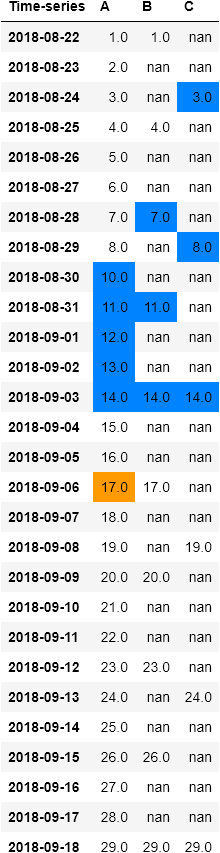

In [17]:
try:
    with open("./visualization/GIF.gif", "rb") as f:
        display(Image(data = f.read(), format = "png", width = 150))
except:
    pass